In [10]:
!pip install nltk
!pip install xgboost
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact 

In [11]:
df_0 = pd.read_csv('/home/anjaliraj/Amit/BTP2/BTP2_Dataset/df0.csv')
df_1 = pd.read_csv('/home/anjaliraj/Amit/BTP2/BTP2_Dataset/df1.csv')
df_2 = pd.read_csv('/home/anjaliraj/Amit/BTP2/BTP2_Dataset/df2.csv')
df_3 = pd.read_csv('/home/anjaliraj/Amit/BTP2/BTP2_Dataset/df3.csv')
df_4 = pd.read_csv('/home/anjaliraj/Amit/BTP2/BTP2_Dataset/df4.csv')

print(df_0)
print(df_1)
print(df_2)
print(df_3)
print(df_4)

                                            Sentences     Label
0   Rivers , like the Colorado River , carry enorm...  Negative
1   For example , for the family , she will choose...  Positive
2                                         Function(s)  Negative
3   Redistribution of population : The density of ...  Negative
4                   ( positively , negatively ) III .  Negative
..                                                ...       ...
69     However , it can also repel push awayobjects .  Negative
70  If the mother feels that the child does not wa...  Positive
71  Hence the mother should consider changing the ...  Positive
72  When the solution dries up to half of the orig...  Negative
73  When your mother gives upma for breakfast you ...  Positive

[74 rows x 2 columns]
                                            Sentences     Label
0   Besides , the farmes grow tobacco , camphor , ...  Negative
1   You might have observed your mother boiling th...  Positive
2   The teacher a

In [12]:
import pandas as pd

data = pd.concat([df_0, df_1,df_2,df_3,df_4], ignore_index=True)

# Save the merged DataFrame to a new CSV file
data.to_csv("data.csv", index=False)

# Optionally, you can print the first few rows of the merged DataFrame
print(data.head())


                                           Sentences     Label
0  Rivers , like the Colorado River , carry enorm...  Negative
1  For example , for the family , she will choose...  Positive
2                                        Function(s)  Negative
3  Redistribution of population : The density of ...  Negative
4                  ( positively , negatively ) III .  Negative


In [13]:
data

,Sentences,Label
0,"Rivers , like the Colorado River , carry enorm...",Negative
1,"For example , for the family , she will choose...",Positive
2,Function(s),Negative
3,Redistribution of population : The density of ...,Negative
4,"( positively , negatively ) III .",Negative
...,...,...
365,Water : Controls the qualities of the cells by...,Negative
366,The tailor refused to alter the shirt because ...,Positive
367,"For example , if a housewife is not able to co...",Positive
368,Even in the deserts crops are being produced b...,Negative


Label
Negative    250
Positive    120
Name: count, dtype: int64


/tmp/ipykernel_181155/2715679250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


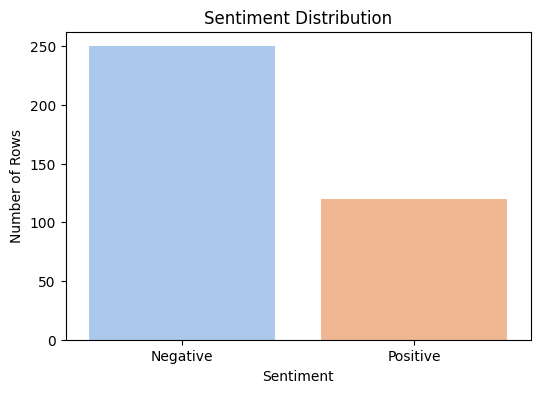

In [14]:
sentiment_count = data['Label'].value_counts()

print(sentiment_count)

plt.figure(figsize = (6,4))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Rows')
plt.show()

In [15]:
data['Label'] = data['Label'].astype('category').cat.codes
data['Label'] = data['Label'].astype("int64")
print(data)


                                             Sentences  Label
0    Rivers , like the Colorado River , carry enorm...      0
1    For example , for the family , she will choose...      1
2                                          Function(s)      0
3    Redistribution of population : The density of ...      0
4                    ( positively , negatively ) III .      0
..                                                 ...    ...
365  Water : Controls the qualities of the cells by...      0
366  The tailor refused to alter the shirt because ...      1
367  For example , if a housewife is not able to co...      1
368  Even in the deserts crops are being produced b...      0
369  Well ahead of the festival , people clean thei...      1

[370 rows x 2 columns]


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK corpora
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE) # remove punctuation
    text = text.lower() # convert to lowercase
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")] # lemmatization
    text = [word for word in text if not word in stop_words] # remove stopwords
    text = " ".join(text)
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anjaliraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anjaliraj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Apply the text cleaning function to our data
data['Processed_Reviews'] = data.Sentences.apply(lambda x: clean_text(x))

# df_4['Processed_Reviews'] = df_4.Sentences.apply(lambda x: clean_text(x))

In [19]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [20]:
print(data)

                                             Sentences  Label  \
0    Rivers , like the Colorado River , carry enorm...      0   
1    For example , for the family , she will choose...      1   
2                                          Function(s)      0   
3    Redistribution of population : The density of ...      0   
4                    ( positively , negatively ) III .      0   
..                                                 ...    ...   
365  Water : Controls the qualities of the cells by...      0   
366  The tailor refused to alter the shirt because ...      1   
367  For example , if a housewife is not able to co...      1   
368  Even in the deserts crops are being produced b...      0   
369  Well ahead of the festival , people clean thei...      1   

                                     Processed_Reviews  
0    river  like colorado river  carry enormous loa...  
1    example  family  choose balanced diet  select ...  
2                                             fu

In [21]:
!nvidia-smi

Tue Apr 30 17:17:45 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.67                 Driver Version: 550.67         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     Off |   00000000:CA:00.0 Off |                    0 |
|  0%   65C    P0            293W /  300W |   41190MiB /  46068MiB |    100%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
data_features = vectorizer.fit_transform(data['Processed_Reviews'])
data_features = data_features.toarray()

In [23]:
print(data_features.shape)
# print(data_test_features.shape)

(370, 1729)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, data['Label'], test_size=0.333, random_state=42)
# X_train = data_features
# y_train = data['Label']

# X_test = data_test_features
# y_test = df_4['Label']

In [25]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

model = xgb.XGBClassifier(max_depth=10, n_estimators=1000, learning_rate=0.01)


In [26]:
# Initialize KFold with desired number of folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Confusion Matrix:


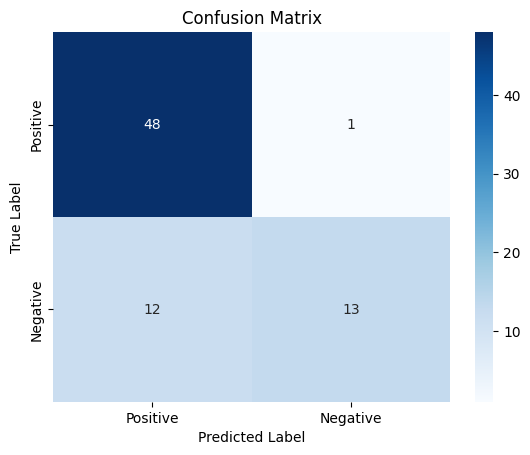

Confusion Matrix:


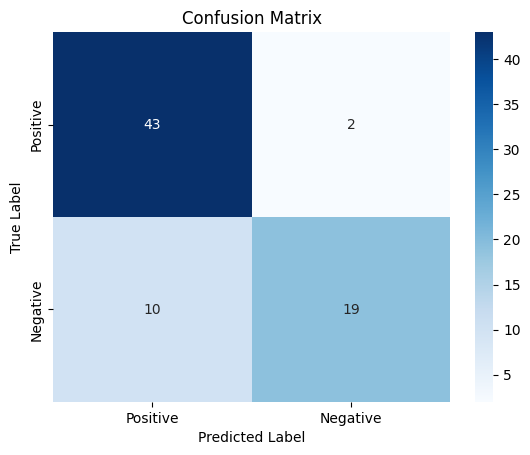

Confusion Matrix:


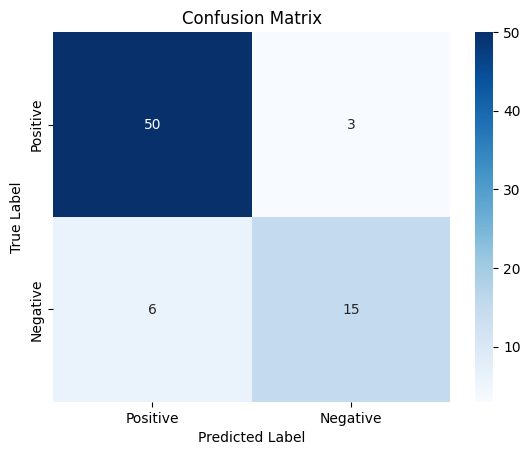

Confusion Matrix:


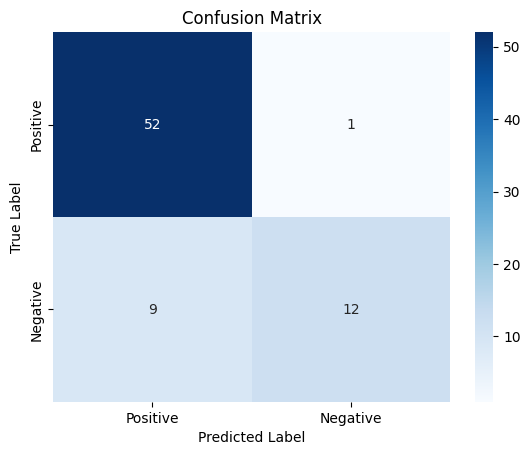

Confusion Matrix:


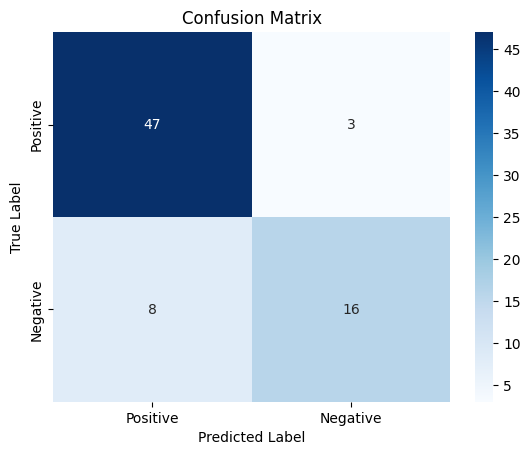

Average Accuracy: 0.8513513513513514


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

# Initialize an empty list to store confusion matrices
confusion_matrices = []
accuracies = []

for train_index, test_index in kfold.split(data):
    # X_train, X_test = X[train_index], X[test_index]
    # y_train, y_test = y[train_index], y[test_index]
    X_train,X_test = data_features[train_index],data_features[test_index]
    y_train, y_test = data['Label'][train_index], data['Label'][test_index]
    
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print("Confusion Matrix:")

    # Define class labels
    classes = ['Positive', 'Negative']
    
    # Plot confusion matrix with heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

    # Add labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # Show plot
    plt.show()

# Calculate and print the average accuracy across all folds
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)

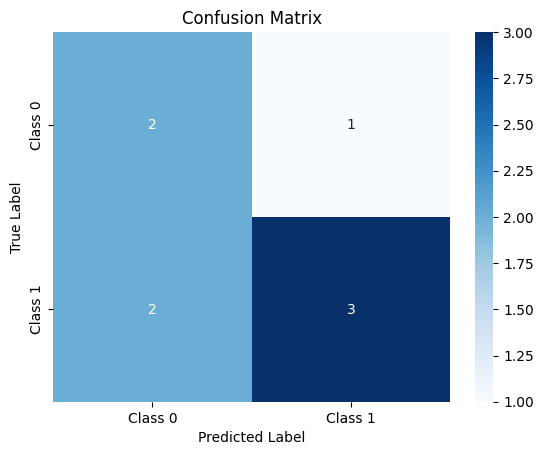

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# Replace these with your actual data
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 1])
y_pred = np.array([1, 1, 1, 0, 0, 1, 0, 0])

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
classes = ['Class 0', 'Class 1']

# Plot confusion matrix with heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show plot
plt.show()
